# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Your code here :
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(12, 12))

for class_name in range(10):
    idxs = np.where(y_train == class_name)[0]
    sample = np.random.choice(idxs, 10, replace=False)

<Figure size 1200x1200 with 0 Axes>

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.summary()

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")


c:\Users\Lain\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3841 - loss: 1.7265 - val_accuracy: 0.5538 - val_loss: 1.2855
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5654 - loss: 1.2360 - val_accuracy: 0.5888 - val_loss: 1.1940
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6039 - loss: 1.1268 - val_accuracy: 0.5808 - val_loss: 1.1769
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6448 - loss: 1.0185 - val_accuracy: 0.5952 - val_loss: 1.1379
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6651 - loss: 0.9518 - val_accuracy: 0.6220 - val_loss: 1.1077
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6823 - loss: 0.9058 - val_accuracy: 0.6260 - val_loss: 1.0613
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7114 - loss: 0.8342 - val_accuracy: 0.6490 - val_loss: 1.0126
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7291 - loss: 0.7827 - val_accuracy: 0.

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Your code here :
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.01),  
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_50epochs = model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=512,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5717 - loss: 2.1703
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7130 - loss: 0.8344
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7391 - loss: 0.7693
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7604 - loss: 0.7074
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7651 - loss: 0.6873
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7778 - loss: 0.6553
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7824 - loss: 0.6424
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7827 - loss: 0.6399
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7826 - loss: 0.6421
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7938 - loss: 0.6136
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7932 - loss: 0.6099
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy:

*   Plot the cross entropy loss curve and the accuracy curve

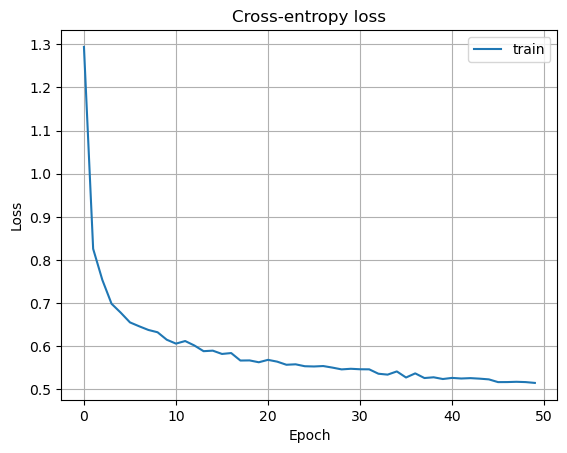

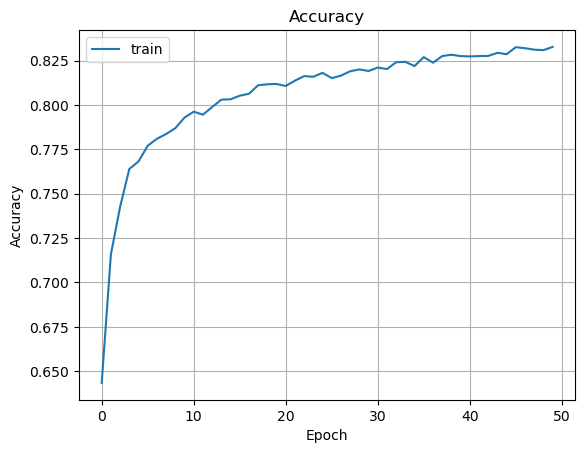

In [8]:
# Your code here :
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_50epochs.history['loss'], label='train')
if 'val_loss' in history_50epochs.history:
    plt.plot(history_50epochs.history['val_loss'], label='val')
plt.title('Cross-entropy loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Accuracy ---
plt.figure()
acc_key = 'accuracy' if 'accuracy' in history_50epochs.history else 'acc'
plt.plot(history_50epochs.history[acc_key], label='train')
if 'val_accuracy' in history_50epochs.history:
    plt.plot(history_50epochs.history['val_accuracy'], label='val')
elif 'val_acc' in history_50epochs.history:
    plt.plot(history_50epochs.history['val_acc'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


vgg_like = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Lain\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
from tensorflow.keras.optimizers import SGD

vgg_like.compile(
    optimizer=SGD(learning_rate=0.01),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg = vgg_like.fit(
    x_train, y_train_cat,   
    epochs=50,
    batch_size=512,
    verbose=1
)

test_loss_vgg, test_acc_vgg = vgg_like.evaluate(x_test, y_test_cat, verbose=0)
print(f"VGG-like Test accuracy: {test_acc_vgg:.4f} | Test loss: {test_loss_vgg:.4f}")


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1689 - loss: 2.2687
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2606 - loss: 2.0972
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.2923 - loss: 1.9968
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.3221 - loss: 1.9354
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.3543 - loss: 1.8435
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3743 - loss: 1.7902
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3840 - loss: 1.7543
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3902 - loss: 1.7252
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4049 - loss: 1.6946
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4148 - loss: 1.6689
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4208 - loss: 1.6479
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

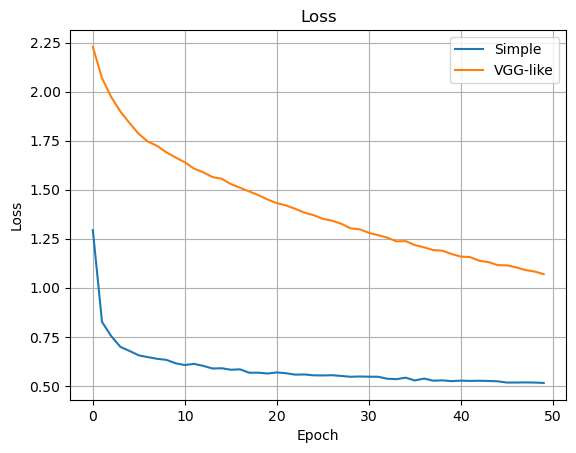

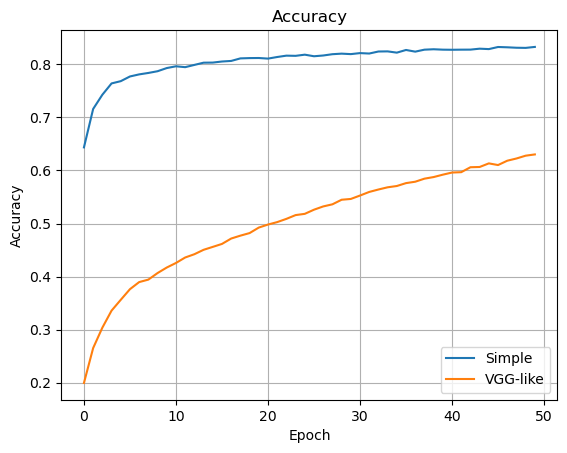

Simple  -> Test acc: 0.6316 | Test loss: 1.2773
VGG-like-> Test acc: 0.5963 | Test loss: 1.1448


In [ ]:
# Your code here :
import matplotlib.pyplot as plt

# Loss
plt.figure()
plt.plot(history_50epochs.history['loss'], label='Simple')
plt.plot(history_vgg.history['loss'], label='VGG-like')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True); plt.show()

# Accuracy
plt.figure()
plt.plot(history_50epochs.history['accuracy'], label='Simple')
plt.plot(history_vgg.history['accuracy'], label='VGG-like')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True); plt.show()


print(f"Simple  -> Test acc: {test_acc:.4f} | Test loss: {test_loss:.4f}")
print(f"VGG-like-> Test acc: {test_acc_vgg:.4f} | Test loss: {test_loss_vgg:.4f}")



**Comment on the observation**

*(Double-click or enter to edit)*
The simple model wins in accuracy.  the vgg learns more slowly. The conclusion is that the most profound model doesn't give better results althought the test loss is lower in the vgg meaning that the probabilities are better calibrated but it classifies less. 
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


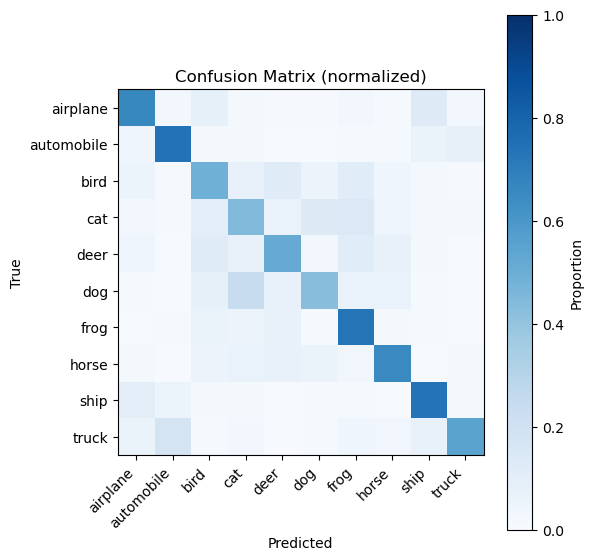

In [15]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = vgg_like.predict(x_test, batch_size=512, verbose=0).argmax(axis=1)
y_true = y_test.squeeze()

cm = confusion_matrix(y_true, y_pred, labels=np.arange(10)).astype(float)
cm = cm / cm.sum(axis=1, keepdims=True)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues', vmin=0, vmax=1)
plt.title('Confusion Matrix (normalized)')
plt.xticks(range(10), class_names, rotation=45, ha='right')
plt.yticks(range(10), class_names)
plt.xlabel('Predicted'); plt.ylabel('True')
plt.colorbar(label='Proportion')
plt.tight_layout()
plt.show()


**Comment here :**

it gets confused on similar classes such as automobile and truck, or bird and airplane, dog and cat. Frog looks quite clean and mammals are the hardest group. 
...

*    Print the test accuracy for the trained model.

In [17]:
# Your code here :
test_loss, test_acc = vgg_like.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.5963


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
from tensorflow.keras.models import Sequential


x_train_64 = tf.image.resize(x_train, (64, 64)).numpy()
x_test_64  = tf.image.resize(x_test,  (64, 64)).numpy()


vgg_full = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_full.summary()


c:\Users\Lain\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

vgg_full.compile(optimizer=SGD(learning_rate=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_vgg_full = vgg_full.fit(
    x_train_64, y_train_cat,
    epochs=10,
    batch_size=512,
    verbose=1
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.1266 - loss: 2.3001
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.1579 - loss: 2.2818
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.1970 - loss: 2.1936
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.2453 - loss: 2.0895
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.2908 - loss: 2.0058
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3189 - loss: 1.9261
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.3402 - loss: 1.8554
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3613 - loss: 1.7966
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3835 - loss: 1.7369
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.4015 - loss: 1.6921


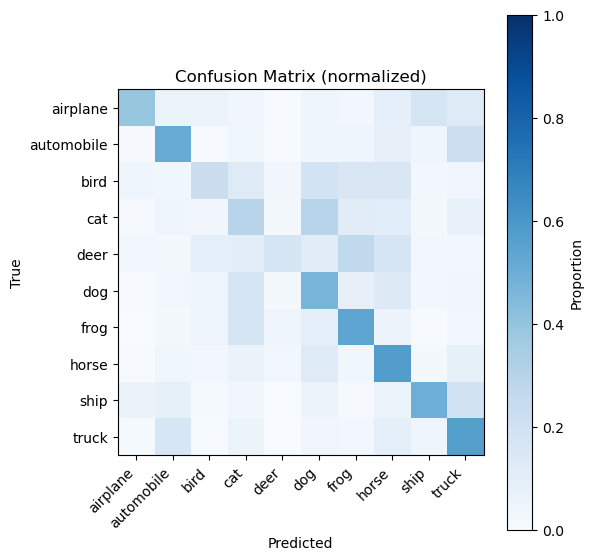

In [21]:


y_pred = vgg_full.predict(x_test_64, batch_size=512, verbose=0).argmax(axis=1)
y_true = y_test.squeeze()

cm = confusion_matrix(y_true, y_pred, labels=np.arange(10)).astype(float)
cm = cm / cm.sum(axis=1, keepdims=True)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues', vmin=0, vmax=1)
plt.title('Confusion Matrix (normalized)')
plt.xticks(range(10), class_names, rotation=45, ha='right')
plt.yticks(range(10), class_names)
plt.xlabel('Predicted'); plt.ylabel('True')
plt.colorbar(label='Proportion')
plt.tight_layout()
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
it introduces non linearity 
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
softmax produces a probability distribution that sums to 1 so this is suited for single-label, multiclass problems
sigmoid outputs 0,1 for each class which means that is suited for multi-label `problems. 
*   What is the difference between categorical crossentropy and binary crossentropy loss?


**Write the answers below :**

1 - Use of activation functions:


it introduces non linearity 
_

2 - Key Differences between sigmoid and softmax:

softmax produces a probability distribution that sums to 1 so this is suited for single-label, multiclass problems
sigmoid outputs 0,1 for each class which means that is suited for multi-label `problems. 

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

CCE: used with softmax outputs for single label k-class tasks. 
BCE: used with sigmoid outputs for independent bernoulli labels 
_
